# Advanced Topic Presentation - Group 12

# Data visualization in Python - Seaborn

Agenda

Displot

Swarmplot

Violin Plot

Pair Plot

Heat Map

In [99]:
# import library
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# show plots in jupyter notebook
%matplotlib inline

In [101]:
# load the data set
titanic = sns.load_dataset('titanic')
print(titanic.head())
titanic.isnull().any()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

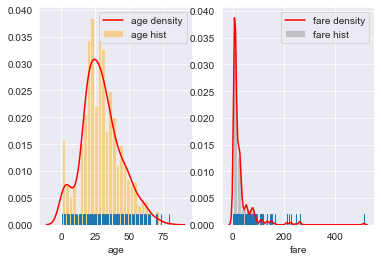

In [102]:
# 1. distplot
# show the age and fare distribution
# drop the NA value in the age attribute
age1 = titanic['age'].dropna()
fare = titanic['fare']
# create 2 sub plots to compare
fig,axes=plt.subplots(1,2)
sns.distplot(age1,rug=True
             ,bins=30
             ,hist_kws={'color':'orange','label':'age hist'}
             ,kde_kws={'color':'red','label':'age density'}
             ,ax=axes[0])
sns.distplot(fare,rug=True
             ,bins=30
             ,hist_kws={'color':'gray','label':'fare hist'}
             ,kde_kws={'color':'red','label':'fare density'}
             ,ax=axes[1])

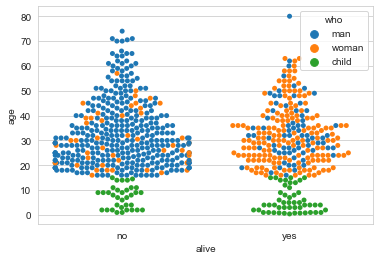

In [106]:
# 2. swarmplot / violinplot
# show the age distribution with gender and alive
sns.swarmplot(x = 'alive', y = 'age', hue = 'who', data = titanic)

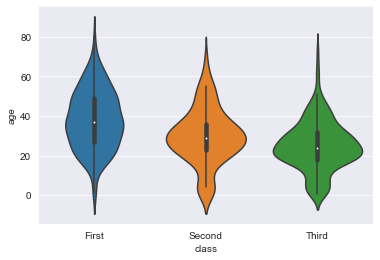

In [119]:
sns.violinplot(x = 'class', y = 'age', data = titanic)

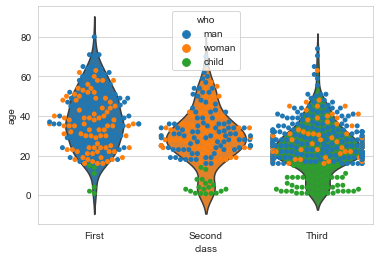

In [107]:
# show age distribution with gender and class
sns.violinplot(x = 'class', y = 'age', data = titanic, inner = None)
sns.swarmplot(x = 'class', y = 'age', hue = 'who', data = titanic)

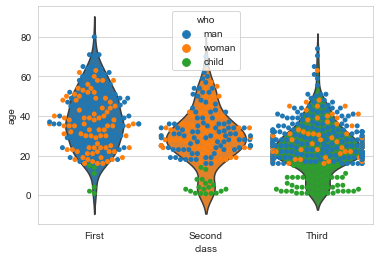

In [108]:
# change background
sns.set_style('whitegrid')
sns.violinplot(x = 'class', y = 'age', data = titanic, inner = None)
sns.swarmplot(x = 'class', y = 'age', hue = 'who', data = titanic)

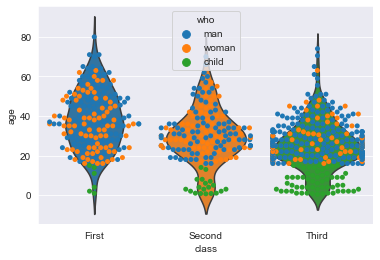

In [109]:
sns.set_style('darkgrid')
sns.violinplot(x = 'class', y = 'age', data = titanic, inner = None)
sns.swarmplot(x = 'class', y = 'age', hue = 'who', data = titanic)

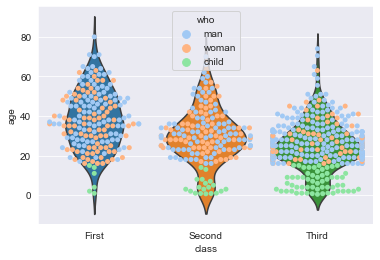

In [110]:
# change points color
sns.set_style('darkgrid')
sns.violinplot(x = 'class', y = 'age', data = titanic, inner = None)
sns.swarmplot(x = 'class', y = 'age', hue = 'who', data = titanic, palette=sns.color_palette('pastel'))

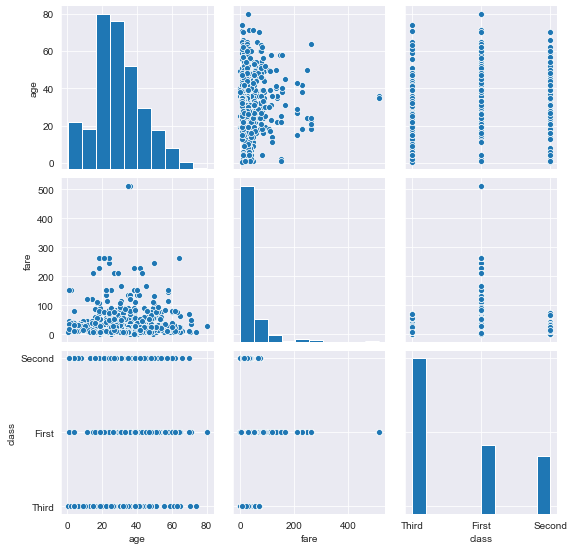

In [111]:
# 3. pair plot
# mutiple variables
sns.pairplot(titanic, vars = ['age', 'fare','class'])

In [112]:
# 4. heat map
flights = sns.load_dataset("flights")
flights.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


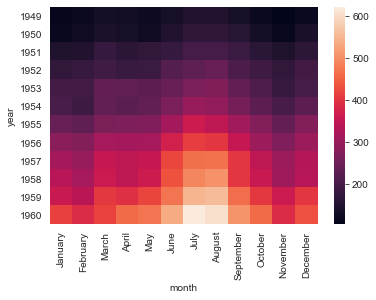

In [113]:
# create the heat map
f=flights.pivot('year','month','passengers')
sns.heatmap(f)

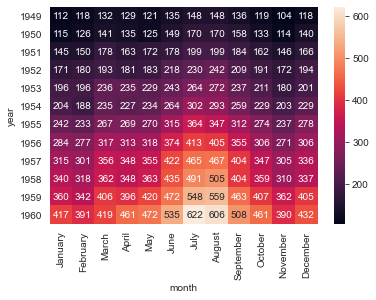

In [114]:
# show values
sns.heatmap(f, annot=True,fmt="d")

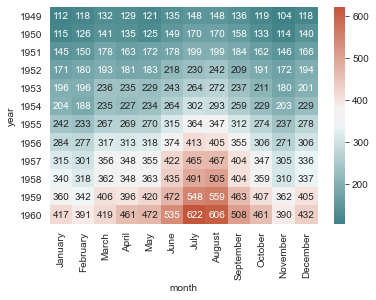

In [115]:
# change color
cmap = sns.diverging_palette(200,20,sep=20,as_cmap=True)
sns.heatmap(f,cmap=cmap, annot=True,fmt='d')

In [116]:
# problem solved
import os
os.chdir('D:\\Document\\Graduate\\IST652 Scripting for Data Analysis\\Mini Project #1')
import pandas as pd
datapath = 'Donors_Data.csv'
donor_df = pd.read_csv(datapath, sep = ',', header = 0)
donor_df = donor_df.iloc[0:,[0,2,3,4,5,9,10,11,-3,-2,-1]]
donor_df.columns = ['DonorID','ZipDummy1','ZipDummy2','ZipDummy3','ZipDummy4','Gender','Wealth','HomeValue','AvgGift','Type','Amount']
mean_hv = donor_df['HomeValue'].mean()
donor_df['HomeValue'].mask(donor_df['HomeValue'] == 0, mean_hv, inplace = True)
import numpy as np
ZipCodeGroup = np.zeros(donor_df.shape[0])
ZipCodeGroup[donor_df[donor_df['ZipDummy1'] == 1].index.tolist()]=2
ZipCodeGroup[donor_df[donor_df['ZipDummy2'] == 1].index.tolist()]=3
ZipCodeGroup[donor_df[donor_df['ZipDummy3'] == 1].index.tolist()]=4
ZipCodeGroup[donor_df[donor_df['ZipDummy4'] == 1].index.tolist()]=5
donor_df.insert(0,'ZipCodeGroup', ZipCodeGroup)
donor_df['ZipCodeGroup'].mask(donor_df['ZipCodeGroup'] == 0, 1, inplace = True)
donor_df_grouped = donor_df.groupby(['ZipCodeGroup', 'Wealth'], as_index = False)['Amount'].sum()
donor_df_grouped

,ZipCodeGroup,Wealth,Amount
0,1.0,1,0.00
1,1.0,2,0.00
2,1.0,8,0.00
3,2.0,0,56.00
4,2.0,1,134.00
5,2.0,2,96.00
6,2.0,3,198.00
7,2.0,4,261.00
8,2.0,5,113.00
9,2.0,6,241.00


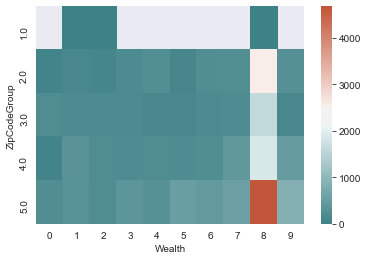

In [117]:
d = donor_df_grouped.pivot('ZipCodeGroup','Wealth','Amount')
sns.heatmap(d,cmap=cmap)